In [1]:
import os

from utils import get_dataset, read_paths, pickle_data, unpickle_data
from desc_calculators import compute_fg_2D_pharm, compute_fg_2D_topo, compute_fg_MACCS, compute_fg_morgan

reload = True
fingerprinter = compute_fg_2D_pharm

data_antidecoys = None
data_bidirectional = None
if not os.path.exists('data_antidecoys.pickle') or reload:
    print('Creating dataset. This may take a while...')
    data_antidecoys = get_dataset(read_paths('antidecoys_data/paths.pickle'), fingerprinter)
    data_bidirectional = get_dataset(read_paths('bidirectional_data/paths.pickle'), fingerprinter)
    data_antidecoys.insert(1, 'Type', [1] * data_antidecoys.shape[0])
    data_bidirectional.insert(1, 'Type', [0] * data_bidirectional.shape[0])
    pickle_data(data_antidecoys, 'data_antidecoys.pickle')
    pickle_data(data_bidirectional, 'data_bidirectional.pickle')
else:
    print('Loading precomputed data...')
    data_antidecoys = unpickle_data('data_antidecoys.pickle')
    data_bidirectional = unpickle_data('data_bidirectional.pickle')

data_antidecoys.shape, data_bidirectional.shape

Creating dataset. This may take a while...


((1159, 3350), (1147, 3350))

In [2]:
import pandas as pd

data = pd.concat([data_antidecoys, data_bidirectional], axis=0)

In [3]:
from sklearn.metrics.pairwise import pairwise_distances

dist_matrix_anti = pairwise_distances(data[data['Type'] == 1].iloc[:,2:], metric='jaccard', n_jobs=2)
dist_matrix_bi = pairwise_distances(data[data['Type'] == 0].iloc[:,2:], metric='jaccard', n_jobs=2)
dist_matrix_anti.shape, dist_matrix_bi.shape

/home/sichom/software/miniconda/envs/antidecoys-analysis/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/sichom/software/miniconda/envs/antidecoys-analysis/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/sichom/software/miniconda/envs/antidecoys-analysis/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the F

((1159, 1159), (1147, 1147))

In [4]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

def get_distances(dist_matrix):
    values = numpy.array([])
    for i in range(1, dist_matrix.shape[0]):
        values = numpy.append(values, dist_matrix.diagonal(-i))
    weights = numpy.ones_like(values)/len(values)
    return values, weights

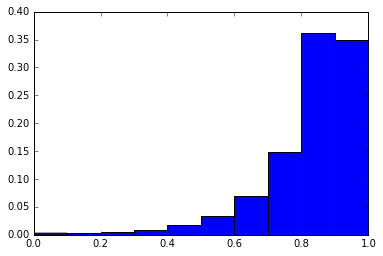

In [5]:
vals, weights = get_distances(dist_matrix_anti)
plt.hist(vals, weights=weights)
plt.show()

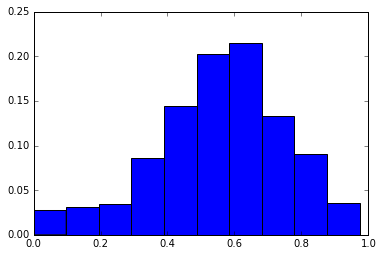

In [6]:
vals, weights = get_distances(dist_matrix_bi)
plt.hist(vals, weights=weights)
plt.show()

In [7]:
def avg_dist(dist_matrix):
    return dist_matrix.sum() / (dist_matrix.shape[0]**2 - dist_matrix.shape[0])

avg_dist(dist_matrix_anti), avg_dist(dist_matrix_bi)

(0.82663338263747088, 0.55666878718433421)

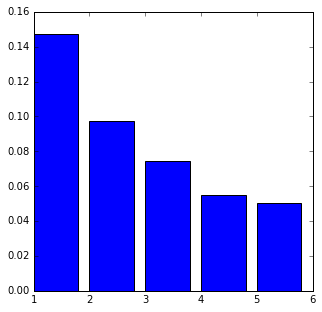

In [8]:
from utils import do_PCA, plot_eigenvalues

pca_data, eigvals = do_PCA(data.iloc[:,2:])
plot_eigenvalues(eigvals)

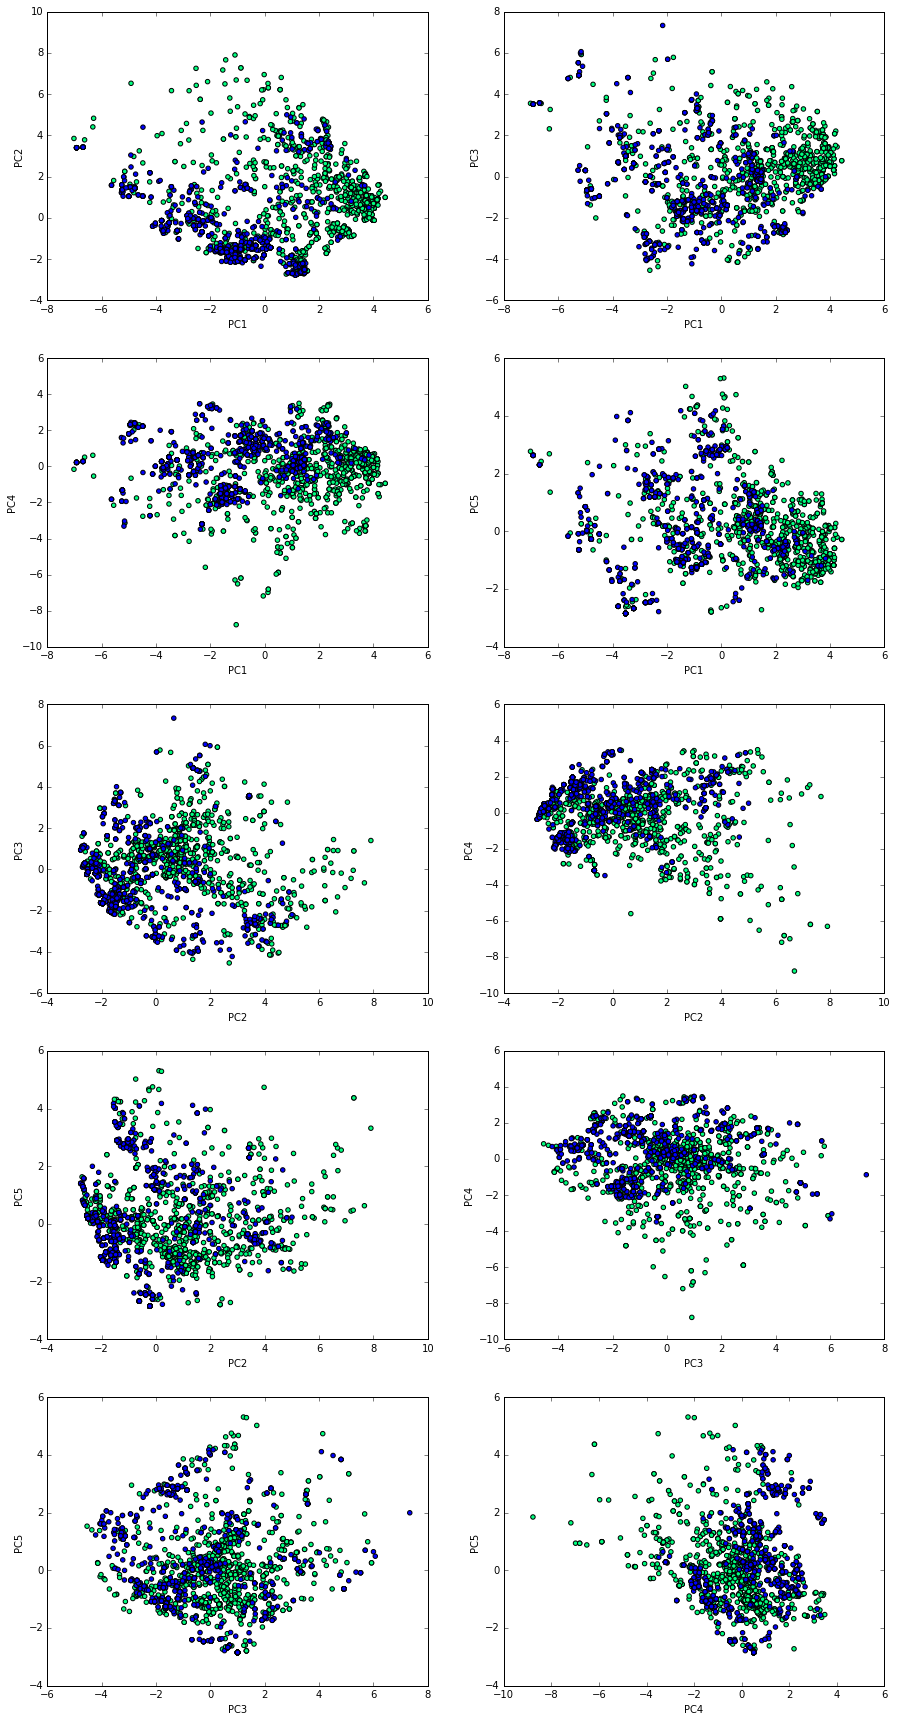

In [9]:
from utils import plot_PCA_2D, plot_PCA_3D

plot_function = plot_PCA_2D

plot_function(pca_data, data.Type)

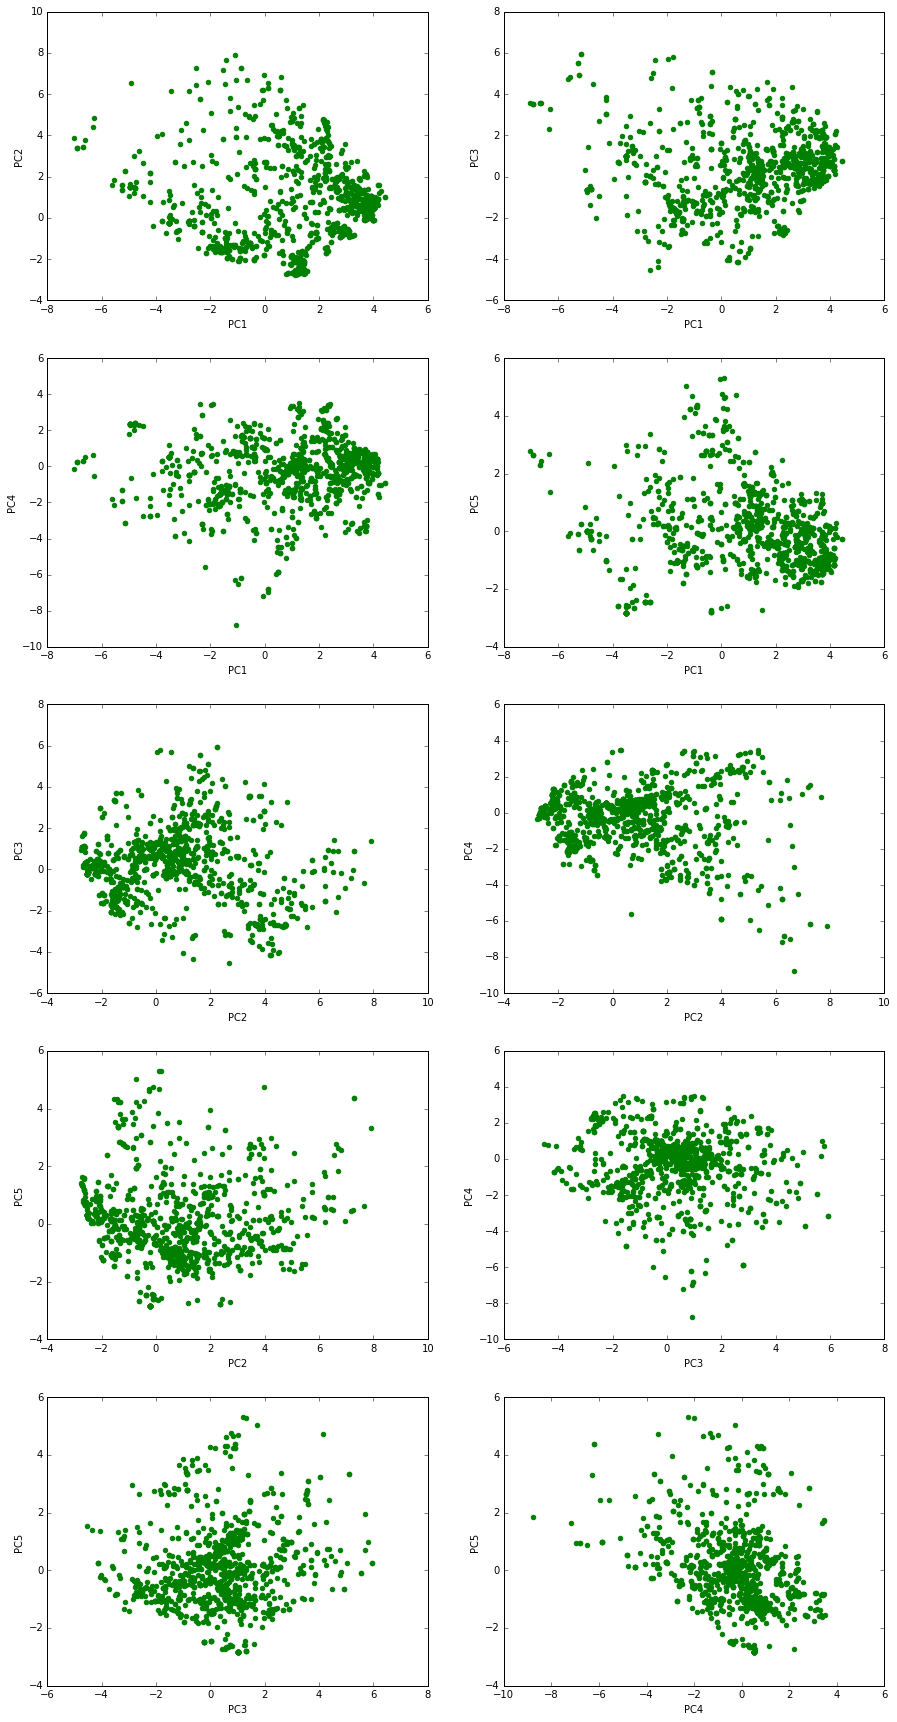

In [10]:
mask = numpy.array(data['Type'] == 1) # only those generated using antidecoys
plot_function(pca_data[mask], color='green')

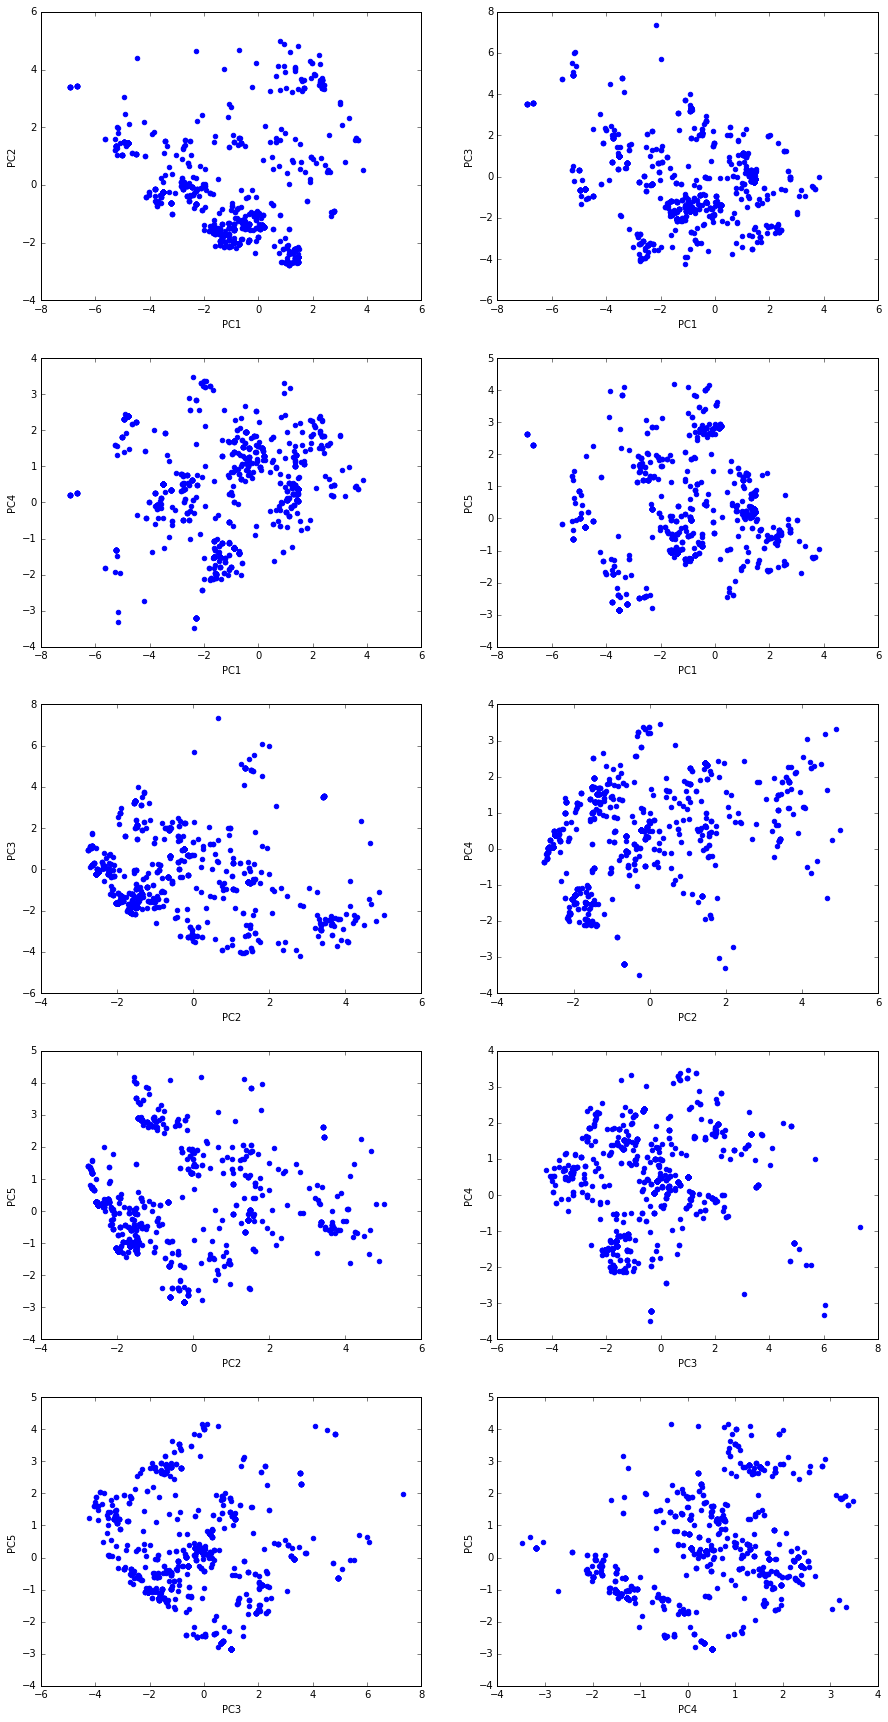

In [11]:
mask = numpy.array(data['Type'] == 0) # only those generated using bidirectional search

plot_function(pca_data[mask], color='blue')